# Updating dfs

## Updating values in df 

import packages and data

In [1]:
import numpy as np
import pandas as pd
import random

#Set seed 
random.seed(42)

# Read in data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
# Add column body mass in kg

penguins['body_mass_kg'] = penguins['body_mass_g']/1000

#confirm that code was correct
print('body_mass_kg' in penguins.columns)

True


In [8]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.750
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.800
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.250
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.450
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,4.000
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,3.400
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,3.775
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,4.100


In [13]:
# Create random 3 digit codes

codes = random.sample(range(100,1000), len(penguins)) #sampling without replacement


In [15]:
# insert codes at the front of data frame
penguins.insert(loc = 0, #index
                column = 'id_code',
               value = codes)
penguins.head()

ValueError: cannot insert id_code, already exists

## A single value 

access single value in `pandas.DataFrame` isong locators
- `at[]` to select by labels
- `iat[]` to select by index position

syntax:
```
df.at[ single_index_value, 'column_name']
```
* `at[]` equivalent of `loc[]` when accessing single value 

In [18]:
penguins = penguins.set_index('id_code')


KeyError: "None of ['id_code'] are in the columns"

In [19]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg
id_code,,,,,,,,,
201,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.750
802,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.800
476,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.250
657,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
760,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.450
...,...,...,...,...,...,...,...,...,...
430,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,4.000
423,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,3.400
254,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,3.775


what was the bill length of the penguin with id: 657?

In [24]:
#Check bill length of penguin with ID 657
penguins.at[657, 'bill_length_mm']

nan

In [27]:
# Correct bill length of penguin with id 657
penguins.at[657, 'bill_length_mm'] = 38.3

# Confirm value was updated
penguins.loc[657]

species                 Adelie
island               Torgersen
bill_length_mm            38.3
bill_depth_mm              NaN
flipper_length_mm          NaN
body_mass_g                NaN
sex                        NaN
year                      2007
body_mass_kg               NaN
Name: 657, dtype: object

If we want to access or update a single value by index position we use `iat[]` locator

Syntax:
```
df.iat[index_location, column_integer_location]
```
Dynamically get the location of single column
```
df.columns.get_loc('column_name')
```

## Checking
a. Obtain the location of `bill_length_mm` column
b. use `iat[]` to access bull length for the penguin with id 657 and revert to na


In [29]:
penguins.columns.get_loc('bill_length_mm')

2

In [43]:
penguins.iat[3, 2] = np.nan
penguins.iloc[3]

species                 Adelie
island               Torgersen
bill_length_mm             NaN
bill_depth_mm              NaN
flipper_length_mm          NaN
body_mass_g                NaN
sex                        NaN
year                      2007
body_mass_kg               NaN
Name: 657, dtype: object

## Multiple values in a column 

### Using a condition

Ex. 
We want to classify palmer penguins such that:
- penguins with body mass <3kg are small 
- penguings with 3<= body mass < 5kg are medium
- penguins with 5< body mass are large



In [50]:
# Create list with the conditions
conditions = [penguins.body_mass_kg <3, 
             (3<= penguins.body_mass_kg) & (penguins.body_mass_kg < 5),
             5 <= penguins.body_mass_kg]
# Create list with the choices
choices = ['small', 'medium', 'large']

# Add the selections using np.select
penguins['size'] = np.select(conditions,
                            choices,
                            default = np.nan)

#Display head
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg,size
id_code,,,,,,,,,,
201,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.75,medium
802,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.80,medium
476,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.25,medium
657,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,nan
760,Adelie,Torgersen,NaN,19.3,193.0,3450.0,female,2007,3.45,medium


## Update values by selecting them 

We can do this with `loc` or `iloc`

syntax:
``` 
df.loc[row_selection, column_name] = new_variables
```

Ex. update male to m 


In [53]:
#Select row with sex = male and simplify values
penguins.loc[penguins.sex == 'male', 'sex'] = 'M'


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg,size
id_code,,,,,,,,,,
201,Adelie,Torgersen,39.1,18.7,181.0,3750.0,M,2007,3.75,medium
802,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.80,medium
476,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.25,medium
657,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,nan
760,Adelie,Torgersen,NaN,19.3,193.0,3450.0,female,2007,3.45,medium


In [54]:
# Check changes in 'sex' column
print(penguins.sex.unique())

['M' 'female' nan]


#### Best practices

We want to update 'fema;e' vals too

In [56]:
# Select rows where sex is female and atempt to update
penguins.loc[penguins.sex == 'female', 'sex'] = 'F'

** Avoid chanded indexing ** use 'loc' instead 

## Check-in 
Update the 'female' values without the warning and check that values were updated

In [59]:
print(penguins.sex.unique())

['M' 'F' nan]


# Views vs copies

## Ex 
we only want biscoe, and want to add a new column

In [62]:
biscoe = penguins[penguins.island == 'Biscoe']

#Other analysis

# Add a column
biscoe['sample_column'] = 100

/tmp/ipykernel_1047092/2664277498.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biscoe['sample_column'] = 100


Can explicitly ask for a copy with `copy` method

In [64]:
biscoe = penguins[penguins.island == 'Biscoe'].copy()

#Other analysis

# Add a column
biscoe['sample_column'] = 100

No error !

In [66]:
biscoe.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg,size,sample_column
id_code,,,,,,,,,,,
121,Adelie,Biscoe,37.8,18.3,174.0,3400.0,F,2007,3.40,medium,100
151,Adelie,Biscoe,37.7,18.7,180.0,3600.0,M,2007,3.60,medium,100
905,Adelie,Biscoe,35.9,19.2,189.0,3800.0,F,2007,3.80,medium,100
441,Adelie,Biscoe,38.2,18.1,185.0,3950.0,M,2007,3.95,medium,100
349,Adelie,Biscoe,38.8,17.2,180.0,3800.0,M,2007,3.80,medium,100


In [67]:
'sample_column' in penguins.columns #Checking if penguins was modified

False

# Check in 1 reading 

In [70]:
# Just checking my work 

penguins = pd.read_csv(URL)

In [71]:
#1. 
(penguins.groupby(['year', 'species'])
         .body_mass_g
         .max()
)

year  species  
2007  Adelie       4675.0
      Chinstrap    4400.0
      Gentoo       6300.0
2008  Adelie       4700.0
      Chinstrap    4800.0
      Gentoo       6000.0
2009  Adelie       4775.0
      Chinstrap    4450.0
      Gentoo       6000.0
Name: body_mass_g, dtype: float64

<Axes: title={'center': 'Maximum Penguin Body Mass per species per Year'}, xlabel='Body Mass (g)', ylabel='Year, Species'>

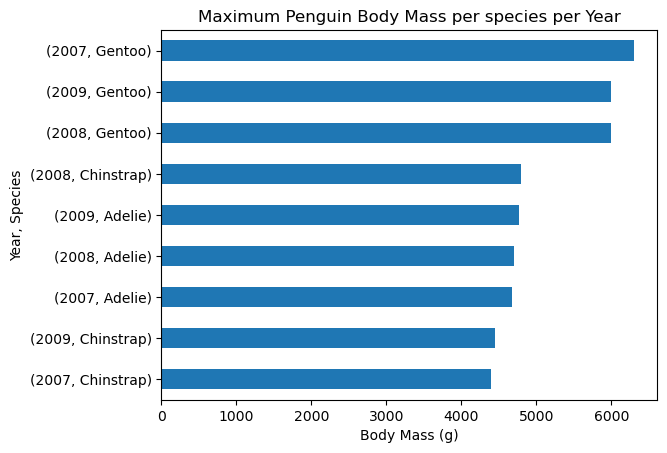

In [74]:
#2.
(penguins.groupby(['year', 'species'])
         .body_mass_g
         .max()
         .sort_values()
         .plot(kind = 'barh',
              title = 'Maximum Penguin Body Mass per species per Year',
              ylabel = ('Year, Species'),
              xlabel = 'Body Mass (g)')
)